In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat

## load data

In [46]:
data = loadmat("christos_ODR.mat",squeeze_me=True)
print(data.keys()) 


dict_keys(['__header__', '__version__', '__globals__', 'spiketimes', 'monkey_ID', 'session_ID', 'behavior', 'delay_neurons', 'behavior_header'])


## behavioral data

#### behavioral header tells us the most interesting fields in behavioral data

In [40]:
data["behavior_header"]

array(['cue     ', 'repeat  ', 'STRT    ', 'FIXON   ', 'CUEON   ',
       'CUEOFF  ', 'FIXOFF  ', 'SACON   ', 'TRLEND  ', 'SPIKE   ',
       'sacc_x  ', 'sacc_y  ', 'sacc_ang'], dtype='<U8')

## we have a total of 750 neurons, for each we have a behavioral dataset and neural dataset

In [45]:
print(len(data["behavior"]))
print(len(data["spiketimes"]))

dict_keys(['__header__', '__version__', '__globals__', 'spiketimes', 'monkey_ID', 'session_ID', 'behavior', 'delay_neurons', 'behavior_header'])
750
750


### test: check which cues were shown to monkey while recording neuron 10

(array([10.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.,  0.,  0., 10.,  0.,
         0., 10.,  0.,  0., 10.,  0., 10.]),
 array([1.  , 1.35, 1.7 , 2.05, 2.4 , 2.75, 3.1 , 3.45, 3.8 , 4.15, 4.5 ,
        4.85, 5.2 , 5.55, 5.9 , 6.25, 6.6 , 6.95, 7.3 , 7.65, 8.  ]),
 <BarContainer object of 20 artists>)

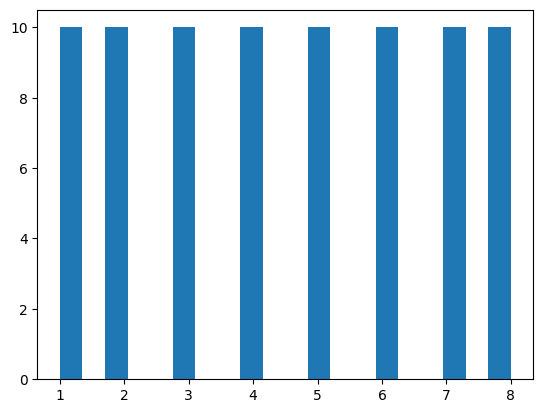

In [52]:
plt.hist(data["behavior"][10][:,0],bins=20)

#### * one each trial, 1 of 8 equally spaced cue stimulus presented on a invisible ring. I don't think the details matter here, but if want to know more details about it (eg eccentricy, etc) please let me know. 

#### * Important thing is that spike times are aligned to cue when the monkey starts fixation; at 1 s, the stimulus is ON for 500 ms. Delay ends at 4.5 s and the monkey should make a saccade towards the right target. Only correct trials in this dataset. 

### test: count delay spikes of each neuron

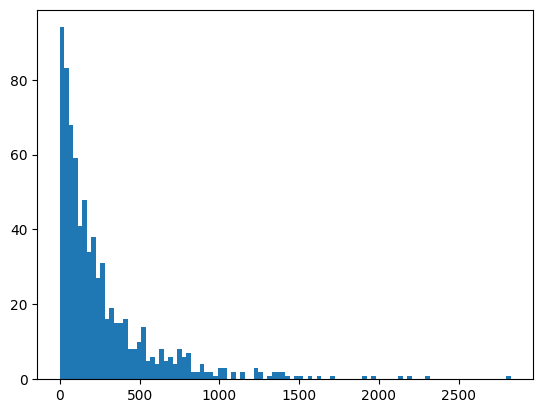

In [70]:
delay_spikes = np.array([np.sum((neuron>1) & (neuron<1.5)) for neuron in data["spiketimes"]])
_ = plt.hist(delay_spikes,100)

### neurons considered to have "persistent activity" have more delay spike counts, but not by a lot

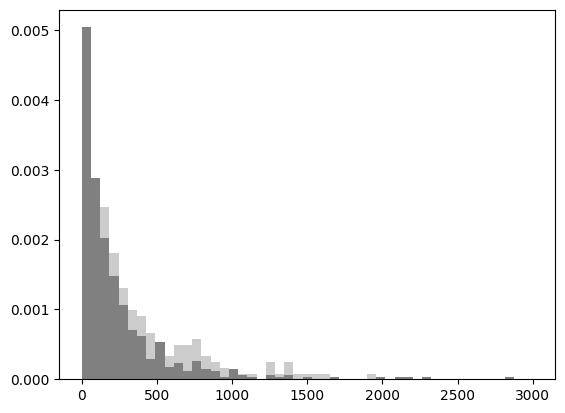

In [76]:
_ = plt.hist(delay_spikes[data["delay_neurons"]==1],bins=np.linspace(0,3000),density=True,color="black",alpha=0.2)
_ = plt.hist(delay_spikes[data["delay_neurons"]==0],bins=np.linspace(0,3000),density=True,color="gray")